In [1]:
import numpy as np
from sklearn import preprocessing

In [4]:
input_data = np.array([[5.1,-2.9,3.3], [-1.2, 7.8, -6.1], [3.9,0.4,2.1], [7.3,-9.9,-4.5]])
print(input_data)

[[ 5.1 -2.9  3.3]
 [-1.2  7.8 -6.1]
 [ 3.9  0.4  2.1]
 [ 7.3 -9.9 -4.5]]


In [5]:
#이진화
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [6]:
#평균 제거
print("\nBefore: ")
print("Mean=", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))


Before: 
Mean= [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]


In [7]:
#평균 제거
data_scaled = preprocessing.scale(input_data)
print("\nAFTER: ")
print("Mean = ", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))


AFTER: 
Mean =  [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std deviation = [1. 1. 1.]


In [8]:
#크기 조정
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nMin max scaled data:\n", data_scaled_minmax)


Min max scaled data:
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]


In [9]:
#정규화
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1)
print("\nL2 normalized data:\n", data_normalized_l2)


L1 normalized data:
 [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]

L2 normalized data:
 [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


In [11]:
#레이블 인코딩
import numpy as np
from sklearn import preprocessing

#샘플 입력 레이블
input_labels = ['red','black', 'red', 'green', 'black', 'yellow', 'white']

#레이블 인코더 생성후 앞에서 정의한 레이블로 학습시키기
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)

LabelEncoder()

In [13]:
#매핑 관계 출력
print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)


Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


In [20]:
# 레이블 인코딩
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print('\nLabels =', test_labels)
print("Encoded values =", list(encoded_values))
print(encoded_values)
type(encoded_values)


Labels = ['green', 'red', 'black']
Encoded values = [1, 2, 0]
[1 2 0]


numpy.ndarray

In [21]:
#숫자 값 디코딩
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print('\nEncoded values =', encoded_values)
print("Decoded labels =", list(decoded_list))


Encoded values = [3, 0, 4, 1]
Decoded labels = ['white', 'black', 'yellow', 'green']


In [35]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()


In [39]:
#로지스틱 회귀분류기
import tkinter
from sklearn import linear_model


x = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4],
             [3.9, 0.9], [2.8,1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0,0,0,1,1,1,2,2,2,3,3,3])

In [42]:
# 로지스틱 회귀 분류기 생성
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)
classifier.fit(x,y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

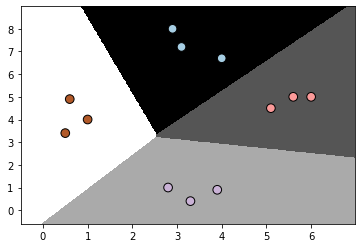

In [43]:
visualize_classifier(classifier, x, y)

In [104]:
#나이브 베이즈 분류기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

from utilities import visualize_classifier

In [145]:
import pandas as pd

data = np.loadtxt('data_multivar_nb.txt', delimiter =',')
x, y = data[:, :-1], data[:, -1]
print(data)

[[ 2.18  0.57  0.  ]
 [ 4.13  5.12  1.  ]
 [ 9.87  1.95  2.  ]
 ...
 [ 4.4   6.75  1.  ]
 [ 8.71  3.38  2.  ]
 [ 6.12 -1.8   3.  ]]


In [111]:
#나이브 베이즈 분류기 생성
classifier = GaussianNB()
#분류기 학습시키기
classifier.fit(x,y)
#학습한 분류기로 예측한 결과 구하기
y_pred = classifier.predict(x)

#정확도 계산
accuracy = 100 * (y == y_pred).sum() / x.shape[0]
print("Accuracy of Naive Bayes classifier = ", round(accuracy, 2), "%")

Accuracy of Naive Bayes classifier =  99.75 %


In [120]:
# 데이터를 학습용과 테스트용으로 나누기
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(x_train,y_train)
y_test_pred = classifier_new.predict(x_test)

In [121]:
#분류기 정확도 계산
accuracy = 100 * (y_test == y_test_pred).sum() / x_test.shape[0]
print("Accuracy of the new classifier = ", round(accuracy,2),"%")

Accuracy of the new classifier =  100.0 %


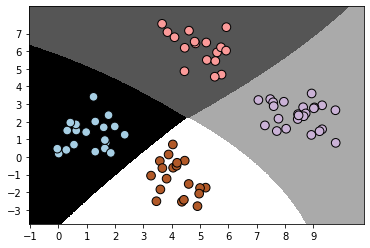

In [124]:
#분류기 성능 시각화
visualize_classifier(classifier_new, x_test, y_test)

In [127]:
num_folds = 3
accuracy_values = cross_val_score(classifier, x, y, scoring = 'accuracy',  cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(),2)) + "%")
precision_values = cross_val_score(classifier,x, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(),2))+"%")
recall_values = cross_val_score(classifier, x, y, scoring = "recall_weighted", cv=num_folds)
print("Recall :"+ str(round(100*recall_values.mean(),2)) + "%")

f1_values = cross_val_score(classifier, x, y, scoring = 'f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(),2))+"%" )

Accuracy: 99.75%
Precision: 99.76%
Recall :99.75%
F1: 99.75%


In [128]:
#오차 행렬 생성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#샘플 레이블 정의
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3]
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3]

In [129]:
#오차 행렬 생성
confusion_mat = confusion_matrix(true_labels,pred_labels)

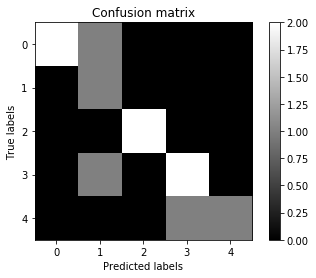

In [130]:
#오차행렬 시각화
plt.imshow(confusion_mat, interpolation = 'nearest', cmap = plt.cm.gray)
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel("True labels")
plt.xlabel("Predicted labels")
plt.show()

In [131]:
#분류 결과 출력
targets = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4']
print('\n', classification_report(true_labels, pred_labels, target_names=targets))


               precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.33      1.00      0.50         1
     Class-2       1.00      1.00      1.00         2
     Class-3       0.67      0.67      0.67         3
     Class-4       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11



In [134]:
#######################################################################################################################################
#############################################          SVM           ##########################################################################################
#######################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score

In [164]:
# 데이터를 담은 입력 파일
input_file = 'C:\\Users\\customer\\Desktop\\income_data.txt'

# 데이터 읽기
x = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
            
        if '?' in line:
            continue

In [173]:
data = line[:-1].split(',')

if data[-1] == '<=50K' and count_class1 < max_datapoints:
    x.append(data)
    count_class1 += 1
.
print(x)

SyntaxError: invalid syntax (<ipython-input-173-9481d8844380>, line 6)

In [175]:
########################################회귀분석################################################

import pickle

import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [208]:
input_file = "C:\\Users\\customer\\Desktop\\data_singlevar_regr.txt"

data = np.loadtxt(input_file, delimiter =',')
x, y = data[:, :-1], data[:,-1]

#데이터 분리하기

num_training = int(0.8 * len(x))
num_test  = len(x) - num_training

In [214]:
#학습 데이터
x_train, y_train = x[num_training:], y[num_training:]
#테스트 데이터
x_test, y_test = x[num_training:], y[num_training:]


In [216]:
#선형 회귀 분석 모델 오브젝트 생성하기
regressor = linear_model.LinearRegression()

#학습 데이터로 회귀분석 모델 학습시키기
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
# 결과 예측 하기
y_test_pred = regressor.predict(x_test)

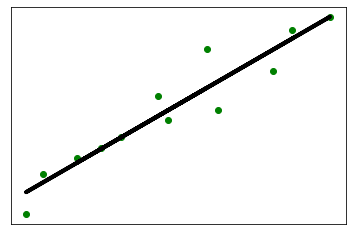

In [222]:
# 출력 값을 그래프로 그리기
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test,y_test_pred, color='black',linewidth =4)
plt.xticks(())
plt.yticks(())
plt.show()

In [224]:
#성능 지표 계산하기
print("Linear regressor performance:")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, y_test_pred),2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test,y_test_pred),2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test,y_test_pred),2))
print("Explain variance score = ", round(sm.explained_variance_score(y_test, y_test_pred),2))
print("R2 score = ", round(sm.r2_score(y_test, y_test_pred),2))

Linear regressor performance:
Mean absolute error =  0.44
Mean squared error =  0.34
Median absolute error =  0.29
Explain variance score =  0.9
R2 score =  0.9


In [226]:
#모델을 저장할 파일 이름
output_model_file = 'model.pkl'

#모델 저장하기
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)
    
#모델 불러오기
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

In [227]:
#테스트 데이터에 대해 예측하기
y_test_pred_new = regressor_model.predict(x_test)
print("\n New mean absolute error =", round(sm.mean_absolute_error(y_test,y_test_pred),2))


 New mean absolute error = 0.44


In [228]:
#######다중 회귀 분석 모델 만들기

import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
from sklearn.preprocessing import PolynomialFeatures

In [251]:
#입력 데이터 파일
input_file = 'C:\\Users\\customer\\Desktop\\Artificial_Intelligence_with_Python_Code\\Chapter 2\code\\data_multivar_regr.txt'

#입력 파일에 담긴 데이터 불러오기
data = np.loadtxt(input_file, delimiter = ',')
x, y =data[:,:-1], data[:,-1]

In [252]:
#학습데이터와 테스트 데이터로 나누기
num_training = int(0.8 * len(x))
num_test = len(x) - num_training

#학습/ 테스트 데이터
x_train, y_train, x_test, y_test = x[:num_training], y[:num_training], x[num_test:], y[num_test:]

In [253]:
#다중 선형 회귀 분석 모델 생성하기
linear_regressor = linear_model.LinearRegression()

#학습 데이터로 학습시키기
linear_regressor.fit(x_train,y_train)

#결과 예측하기
y_pred = linear_regressor.predict(x_test)

In [255]:
# 성능 측정
print("Linear Regressor performance:")
print("Mean absolute error: ",round(sm.mean_absolute_error(y_test, y_pred),2))
print("Mean squared error: ", round(sm.mean_squared_error(y_test, y_pred),2))
print("Median absolute error: ", round(sm.median_absolute_error(y_test, y_pred),2))
print("Explained variance score : ", round(sm.explained_variance_score(y_test, y_pred),2))
print("R2 score: ", round(sm.r2_score(y_test, y_pred),2))

Linear Regressor performance:
Mean absolute error:  3.6
Mean squared error:  20.53
Median absolute error:  3.08
Explained variance score :  0.86
R2 score:  0.86


In [258]:
#다항 회귀
polynomial = PolynomialFeatures(degree=10)
x_train_transformed = polynomial.fit_transform(x_train)
datapoint = [[7.75, 6.35, 5.56]]
poly_datapoint = polynomial.fit_transform(datapoint)
print(x_train_transformed)

[[1.00000000e+00 2.06000000e+00 3.48000000e+00 ... 8.84383448e+07
  1.83230019e+08 3.79623114e+08]
 [1.00000000e+00 6.37000000e+00 3.01000000e+00 ... 7.06981872e+07
  1.70756087e+08 4.12424170e+08]
 [1.00000000e+00 1.18000000e+00 1.20000000e+00 ... 1.07239995e+06
  4.84367310e+06 2.18772568e+07]
 ...
 [1.00000000e+00 6.70000000e-01 7.41000000e+00 ... 5.10715824e+04
  1.61967906e+04 5.13663401e+03]
 [1.00000000e+00 8.26000000e+00 2.93000000e+00 ... 2.35371286e+04
  2.16091727e+04 1.98391381e+04]
 [1.00000000e+00 1.21000000e+00 2.18000000e+00 ... 4.84604101e+04
  7.04676605e+04 1.02469029e+05]]


In [257]:
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(x_train_transformed,y_train)
print("\nLinear regression:\n", linear_regressor.predict(datapoint))
print("\nPolynomial regression:\n", poly_linear_model.predict(poly_datapoint))


Linear regression:
 [36.05286276]

Polynomial regression:
 [41.45234835]
